## 📦 Step 1: Importing Required Libraries
Let's begin by importing all the necessary libraries. We'll need tools for data manipulation, visualization, text cleaning, model training, and evaluation. These will set the foundation for everything we do next.

In [33]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Text preprocessing
import re
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Model and evaluation
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib  # For saving model


## 📄 Step 2: Load and Inspect the Dataset
Time to load our dataset and take a quick peek inside!
We're using a CSV file that contains electronics product reviews along with their sentiment labels (positive or negative).
Let’s check the first few entries, see how many rows and columns we have, and ensure there are no surprises in the structure.

In [39]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset/DatafinitiElectronicsProductData.csv")

# Quick look at the data
df.head()


,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,imageURLs,...,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,upc,weight
0,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
1,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,It's thin and light. I can type pretty easily ...,Nice,Appa,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
2,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,I love the new design the keys are spaced well...,New,Kman,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
3,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
4,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"Our original keyboard was okay, but did not ha...",Nice improvement,Glickster,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds


🧠 Let's check the shape and see what we're working with:

In [3]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7299 entries, 0 to 7298
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   7299 non-null   object 
 1   asins                7299 non-null   object 
 2   brand                7299 non-null   object 
 3   categories           7299 non-null   object 
 4   colors               5280 non-null   object 
 5   dateAdded            7299 non-null   object 
 6   dateUpdated          7299 non-null   object 
 7   dimension            6090 non-null   object 
 8   ean                  2951 non-null   float64
 9   imageURLs            7299 non-null   object 
 10  keys                 7299 non-null   object 
 11  manufacturer         4632 non-null   object 
 12  manufacturerNumber   7299 non-null   object 
 13  name                 7299 non-null   object 
 14  primaryCategories    7299 non-null   object 
 15  reviews.date         7238 non-null   o

## 🧠 Step 3:Initial Glimpse

We’ll now take a peek at the key columns we care about: the actual review (reviews.text) and the associated rating (reviews.rating), which we’ll later convert into sentiment labels.

In [36]:

df[['reviews.text', 'reviews.rating']].head()


,reviews.text,reviews.rating
0,"This keyboard is very easy to type on, but the...",5.0
1,It's thin and light. I can type pretty easily ...,4.0
2,I love the new design the keys are spaced well...,4.0
3,Attached easily and firmly. Has a nice feel. A...,5.0
4,"Our original keyboard was okay, but did not ha...",5.0


## 🧹 Step 4: Data Cleaning & Sentiment Labeling

We’re converting numerical ratings into binary sentiments:

-** Ratings 4 or 5 are marked positive (1)

-** Ratings 3 or below are considered negative (0)



In [40]:
# Drop rows with missing reviews or ratings
df = df[['reviews.text', 'reviews.rating']].dropna()

# Rename columns
df.columns = ['review', 'rating']

# Assign sentiment: rating >= 4 as Positive (1), else Negative (0)
df['sentiment'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)


## 📊 Step 5: Sentiment Distribution & Imbalance Check
This chart helps us identify any imbalance in our dataset. Unsurprisingly, most online product reviews tend to be positive.



/tmp/ipython-input-3943064238.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='coolwarm')


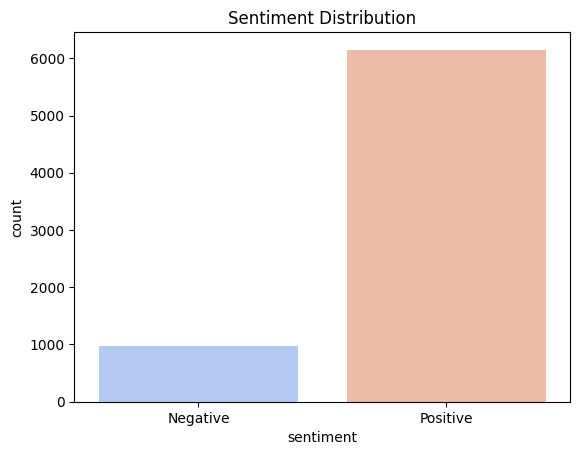

In [41]:
sns.countplot(data=df, x='sentiment', palette='coolwarm')
plt.title("Sentiment Distribution")
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()


## ✂️ Step 6: Text Preprocessing
We’ll clean the text by removing:

URLs

Numbers

Special characters

Extra spaces

This makes our data more machine-friendly.

In [42]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['cleaned_review'] = df['review'].apply(clean_text)


## 📏 Step 7: Analyzing Review Lengths (EDA)
This plot shows the distribution of word counts in reviews. Most reviews are reasonably short, which helps us plan feature extraction accordingly.

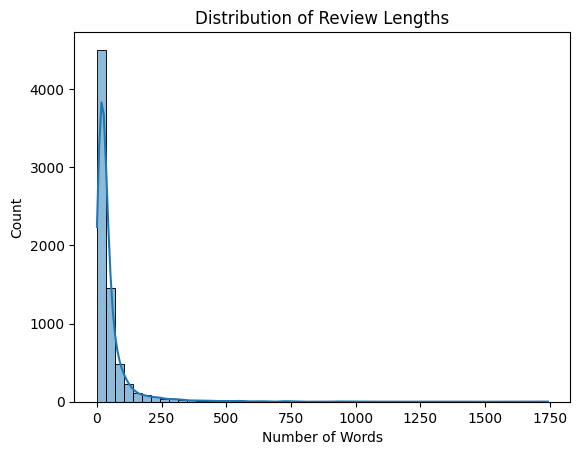

In [43]:
df['review_length'] = df['cleaned_review'].apply(lambda x: len(x.split()))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words")
plt.show()


## 📦 Step 8: Train-Test Split (Stratified)
We split the dataset 80/20 for training and evaluation. Stratification ensures both sets maintain the same positive/negative ratio.



In [65]:
X = df['cleaned_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [66]:
from sklearn.utils import resample

# Combine features and labels for resampling
train_df = pd.concat([X_train, y_train], axis=1)

# Separate classes
positive = train_df[train_df['sentiment'] == 1.0]
negative = train_df[train_df['sentiment'] == 0.0]

# Upsample minority class
negative_upsampled = resample(negative,
                              replace=True,
                              n_samples=len(positive),
                              random_state=42)

# Combine back
train_balanced = pd.concat([positive, negative_upsampled])

# Shuffle
train_balanced = train_balanced.sample(frac=1, random_state=42)

# Extract features and labels
X_train_balanced = train_balanced['cleaned_review']
y_train_balanced = train_balanced['sentiment']


## 🧠 Step 9: Text Vectorization with TF-IDF
We convert text to numerical features using TF-IDF, which gives more weight to distinctive words and less to commonly used ones.

In [67]:
X_train_vec = vectorizer.fit_transform(X_train_balanced)
X_test_vec = vectorizer.transform(X_test)


## 🤖 Step 10: Training the Naive Bayes Classifier
We train a Multinomial Naive Bayes classifier – a great choice for text classification tasks due to its simplicity and performance.

In [68]:
model = MultinomialNB()
model.fit(X_train_vec, y_train_balanced)



MultinomialNB()

## 🧪 Step 11: Making Predictions and Evaluating
After training, let’s see how the model performs on the test set.
We'll use:

Accuracy score to see the overall performance

A classification report to get a breakdown of precision, recall, and F1-score for each sentiment category

This tells us how well the model distinguishes between positive and negative reviews.



In [69]:
y_pred = model.predict(X_test_vec)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy Score: {accuracy:.4f}")

# Classification Report
report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print("📄 Classification Report:\n")
print(report)


✅ Accuracy Score: 0.8696
📄 Classification Report:

              precision    recall  f1-score   support

    Negative       0.52      0.73      0.61       196
    Positive       0.95      0.89      0.92      1230

    accuracy                           0.87      1426
   macro avg       0.74      0.81      0.76      1426
weighted avg       0.89      0.87      0.88      1426



## 🔁 Step 12: Visualizing the Confusion Matrix
This matrix shows how many reviews were correctly vs. incorrectly classified. It visually confirms the performance imbalance between classes.



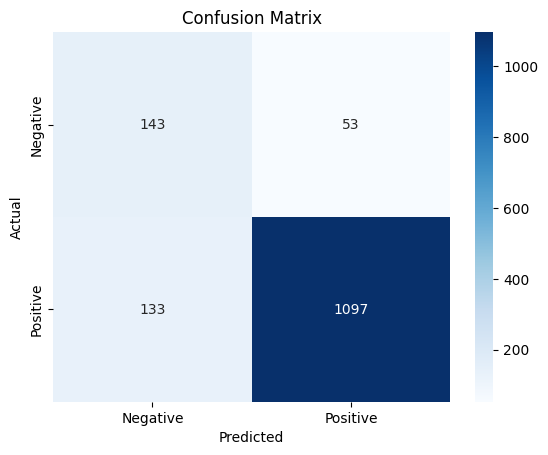

In [70]:
conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## 💾 Step 13: Save the Model and Vectorizer
To make our model reusable, we’ll save both the trained Naive Bayes model and the TF-IDF vectorizer.
This way, we can quickly load and use them later to make predictions on new review data without retraining from scratch.

In [72]:
joblib.dump(model, "sentiment_nb_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']